In [25]:
import os
import uuid
import pandas as pd

In [37]:
cards_path = '/home/hendrixxdiddy/DEV/ALT_School_Data_Engineering/learning_circle_assessement/1st_assessment/transform/cards.csv'
# users_path = '/home/hendrixxdiddy/DEV/ALT_School_Data_Engineering/learning_circle_assessement/1st_assessment/transform/users.csv'

In [38]:
def wrangle(cards_path):
    """
    wrangles cards.csv for presentable presentation
    """
    df = pd.read_csv(cards_path)
    
    # Display the first few rows of the DataFrame
    print(df.head())

    # Get a summary of the DataFrame
    print(df.info())
    
    # get missing values
    print(df.isnull().sum())
    
    # drop rows with missing values
    df = df.dropna()
    
    df = df.fillna(value=0)
    
    # cast float64 to int
    df["user_id"] = df[["user_id"]].astype('int64')
    
    #convert `event_id` to uuid
    df["event_id"] = df[["event_id"]].astype('str')
    
    # cast object to datetime object
    datetime_cols = ["created_at", "updated_at", "event_at"]
    df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime)
    
    # Remove duplicate rows
    df = df.drop_duplicates()
    
    df.to_csv("trans_cards.csv", index=False)
    
    print(df.info())
    

In [39]:
wrangle(cards_path)

     id  user_id   created_by_name           updated_at           created_at  \
0  2298    790.0  Jonathan Johnson  2023-10-23 23:25:30  2023-10-23 23:17:04   
1  2081    633.0   Kathryn Francis  2023-10-23 23:16:17  2023-10-23 23:16:17   
2  2401    611.0    Kristin Haynes  2023-10-23 23:17:27  2023-10-23 23:17:27   
3   519     44.0      Brianna Wong  2023-10-23 23:16:52  2023-10-23 23:10:43   
4    48     35.0   Darlene Santana  2023-10-23 23:10:42  2023-10-23 23:09:01   

   active  type             event_at                              event_id  
0    True  card  2023-10-23 23:25:30  3fd0395e-f47f-4313-9eb0-8519b1062d7b  
1   False  card  2023-10-23 23:16:17  7330b250-df72-4f40-9f53-439d70a4863f  
2    True  card  2023-10-23 23:17:27  9de02005-665a-4fa4-a8f6-7da3793ccf85  
3    True  card  2023-10-23 23:16:52  9de4fe94-192f-4998-9831-37522dd0ed17  
4    True  card  2023-10-23 23:10:42  f7ef95f6-f013-435f-99a2-c02b742af174  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 en

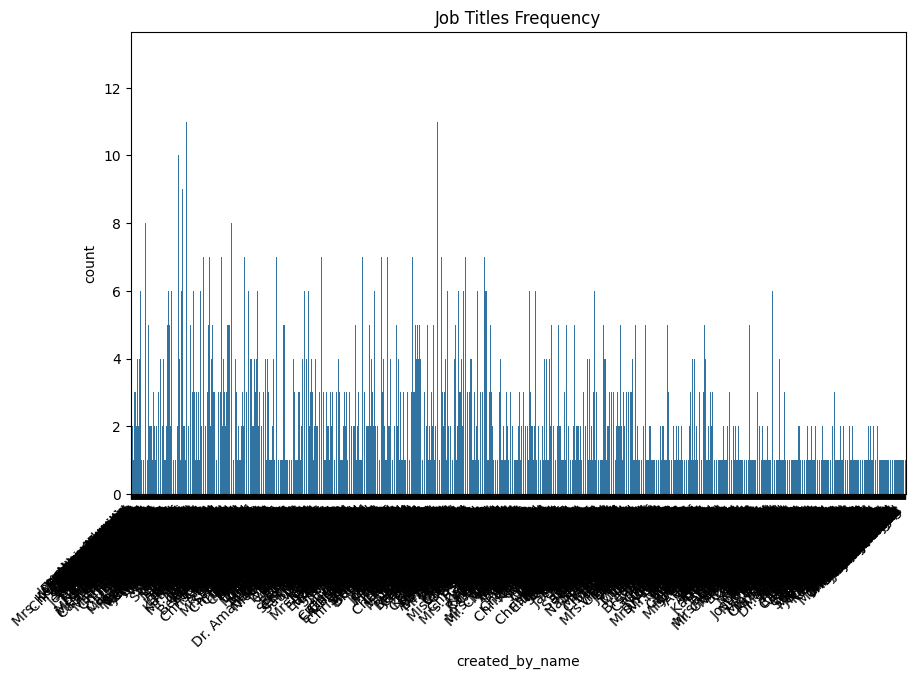

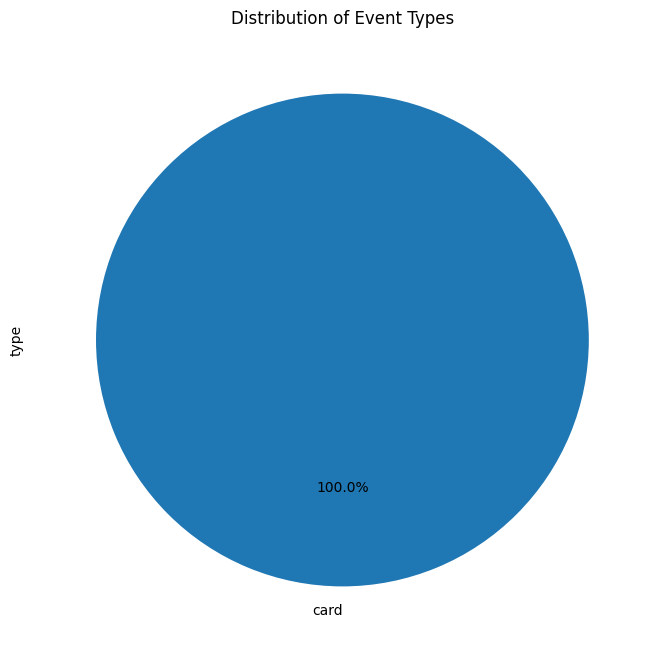

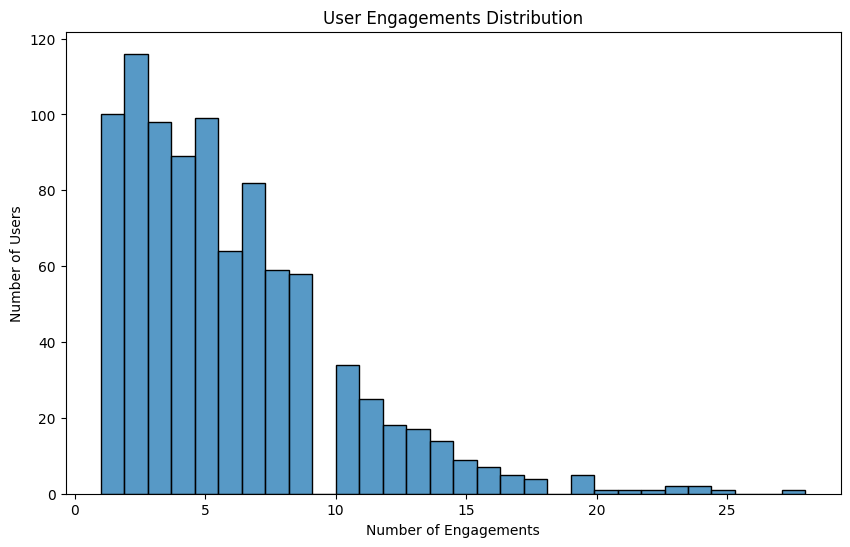

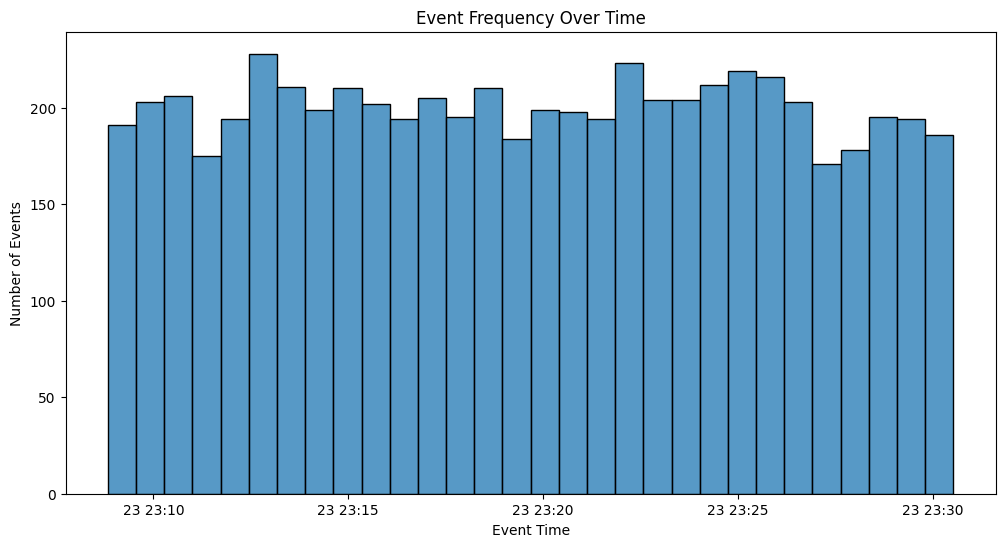

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

events_df = pd.read_csv(cards_path)

# Visualization 1: Bar Chart - Job Titles Frequency
plt.figure(figsize=(10, 6))
sns.countplot(x='created_by_name', data=events_df)
plt.title('Job Titles Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualization 2: Pie Chart - Distribution of Event Types
plt.figure(figsize=(8, 8))
events_df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Event Types')
plt.show()

# Visualization 3: Histogram - User Engagements
plt.figure(figsize=(10, 6))
sns.histplot(events_df['user_id'].value_counts(), bins=30, kde=False)
plt.title('User Engagements Distribution')
plt.xlabel('Number of Engagements')
plt.ylabel('Number of Users')
plt.show()

# Visualization 4: Timeline - Event Frequency Over Time
events_df['event_at'] = pd.to_datetime(events_df['event_at'])
plt.figure(figsize=(12, 6))
sns.histplot(events_df['event_at'], bins=30)
plt.title('Event Frequency Over Time')
plt.xlabel('Event Time')
plt.ylabel('Number of Events')
plt.show()
